<a href="https://colab.research.google.com/github/Tema13379/cian_progect/blob/main/home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Выводим таблицу

In [10]:
df = pd.read_csv('home.csv')
df.columns = ['Город', 'Тип сделки', 'Тип недвижимости', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Микрорайон', 'Улица', 'Дом', 'Станция метро или жд', 'Название жилого комплекса']
df.iloc[::]

,Город,Тип сделки,Тип недвижимости,Этаж квартиры,Сколько этажей в доме,Количество комнат,Общая площадь квартиры,Цена,Микрорайон,Улица,Дом,Станция метро или жд,Название жилого комплекса
0,Балашиха,sale,flat,7,16,1,42.30,7250000,NaN,Юбилейная,4к5,Железнодорожная,NaN
1,Балашиха,sale,flat,3,16,1,34.00,6000000,NaN,Жилгородок,9А,Ольгино,NaN
2,Балашиха,sale,flat,15,22,1,36.39,6390771,NaN,NaN,к8,Некрасовка,Новоград Павлино
3,Балашиха,sale,flat,19,25,1,36.30,5300000,NaN,Яганова,9,Щёлковская,Пехра
4,Балашиха,sale,flat,2,16,1,32.00,4900000,NaN,Октябрьская,17,Железнодорожная,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,Долгопрудный,sale,flat,3,9,2,49.50,8600000,мкр. Гранитный,Молодежная,20,NaN,NaN
4518,Долгопрудный,sale,flat,17,23,1,34.10,8350000,NaN,Парковая,48,Долгопрудная,Бригантина
4519,Долгопрудный,sale,flat,5,5,2,50.70,8850000,NaN,Восточная,39,Долгопрудная,NaN
4520,Долгопрудный,sale,flat,3,9,1,37.00,7500000,NaN,Академика Лаврентьева,5,Водники,NaN


In [ ]:
columns = list(df.columns)
print(columns)
df = df.drop([ 'Тип сделки', 'Тип недвижимости', 'Микрорайон'], axis=1)
columns = list(df.columns)
print(columns)

['Город', 'Тип сделки', 'Тип недвижимости', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Микрорайон', 'Улица', 'Дом', 'Станция метро или жд', 'Название жилого комплекса']
['Город', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Улица', 'Дом', 'Станция метро или жд', 'Название жилого комплекса']


In [ ]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 4522 rows , 10 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Город                      4522 non-null   object 
 1   Этаж квартиры              4522 non-null   int64  
 2   Сколько этажей в доме      4522 non-null   int64  
 3   Количество комнат          4522 non-null   int64  
 4   Общая площадь квартиры     4522 non-null   float64
 5   Цена                       4522 non-null   object 
 6   Улица                      3702 non-null   object 
 7   Дом                        4152 non-null   object 
 8   Станция метро или жд       4456 non-null   object 
 9   Название жилого комплекса  2660 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 353.4+ KB


<Axes: >

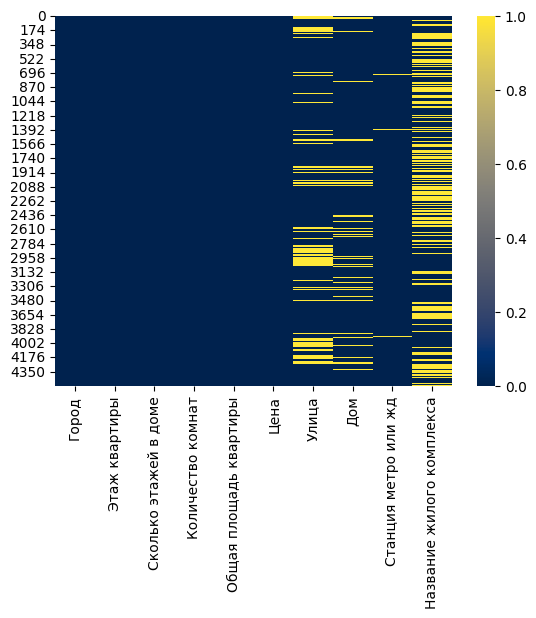

In [ ]:
sns.heatmap(df.isnull(),cmap='cividis')

In [ ]:
df.isnull().sum()

,0
Город,0
Этаж квартиры,0
Сколько этажей в доме,0
Количество комнат,0
Общая площадь квартиры,0
Цена,0
Улица,820
Дом,370
Станция метро или жд,66
Название жилого комплекса,1862


In [ ]:
df.head(5)

,Город,Этаж квартиры,Сколько этажей в доме,Количество комнат,Общая площадь квартиры,Цена,Улица,Дом,Станция метро или жд,Название жилого комплекса
0,Балашиха,7,16,1,42.30,7250000,Юбилейная,4к5,Железнодорожная,NaN
1,Балашиха,3,16,1,34.00,6000000,Жилгородок,9А,Ольгино,NaN
2,Балашиха,15,22,1,36.39,6390771,NaN,к8,Некрасовка,Новоград Павлино
3,Балашиха,19,25,1,36.30,5300000,Яганова,9,Щёлковская,Пехра
4,Балашиха,2,16,1,32.00,4900000,Октябрьская,17,Железнодорожная,NaN


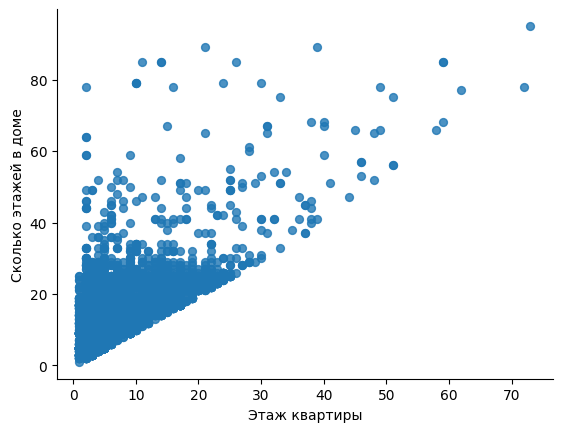

In [ ]:
# @title Этаж квартиры vs Сколько этажей в доме

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Этаж квартиры', y='Сколько этажей в доме', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

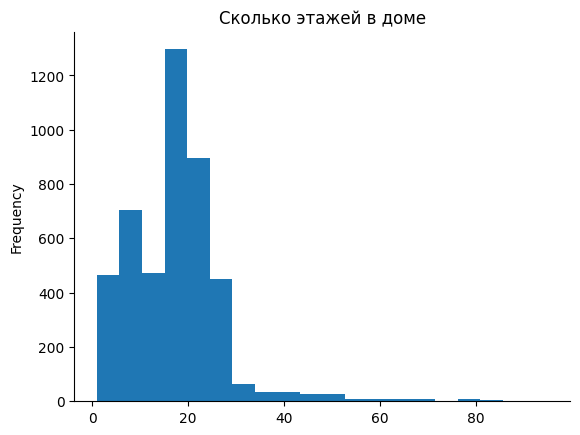

In [ ]:
# @title Сколько этажей в доме

from matplotlib import pyplot as plt
df['Сколько этажей в доме'].plot(kind='hist', bins=20, title='Сколько этажей в доме')
plt.gca().spines[['top', 'right',]].set_visible(False)

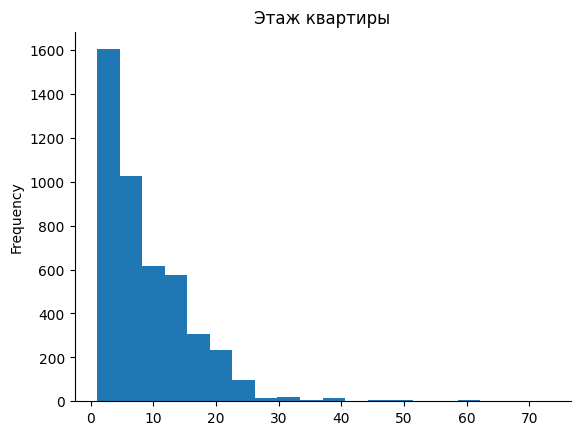

In [ ]:
# @title Этаж квартиры

from matplotlib import pyplot as plt
df['Этаж квартиры'].plot(kind='hist', bins=20, title='Этаж квартиры')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

Улица : 820 (18.134%)
Дом : 370 (8.182%)
Станция метро или жд : 66 (1.46%)
Название жилого комплекса : 1862 (41.176%)


In [12]:
df_cleaned = df.dropna(thresh=2)

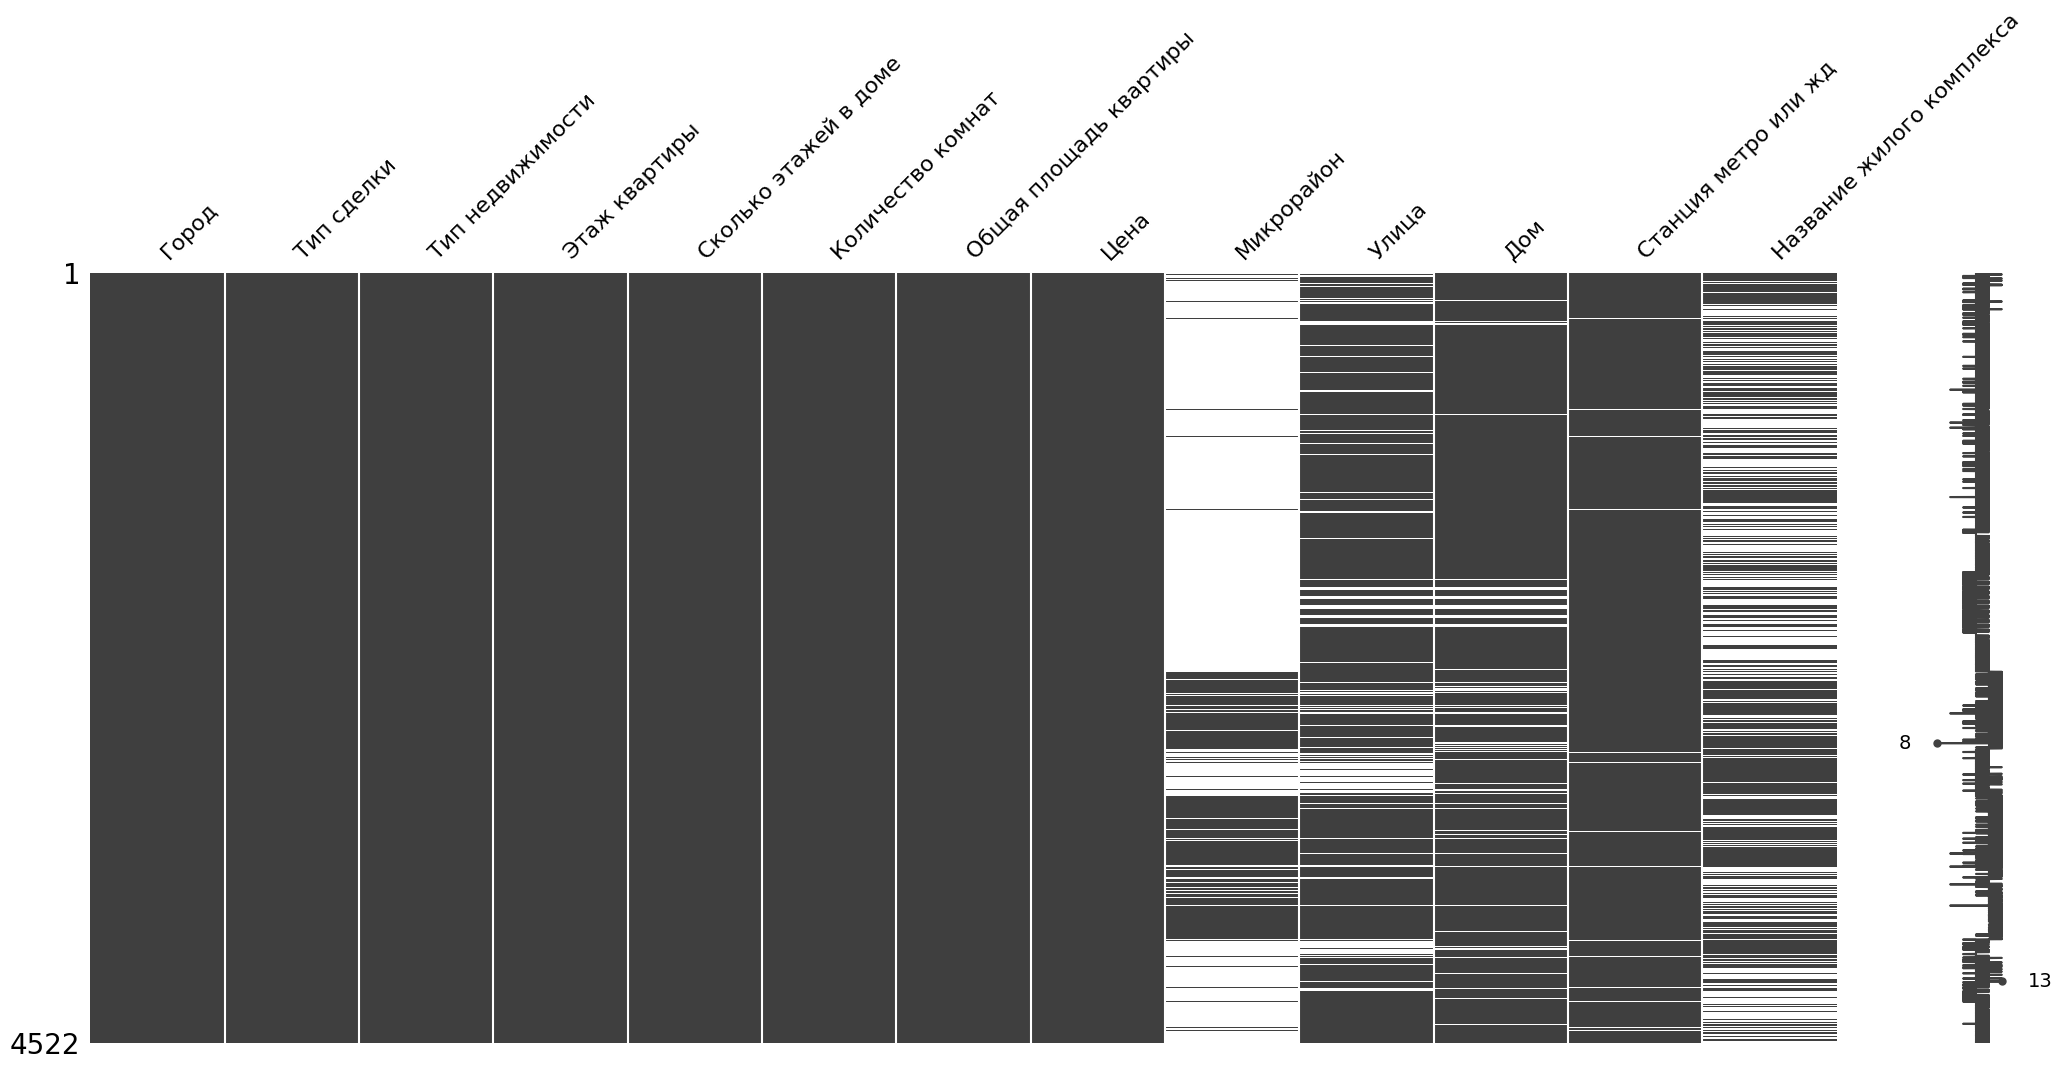

<Figure size 2000x1500 with 0 Axes>

In [13]:
msno.matrix(df_cleaned)
plt.figure(figsize=(20,15))
plt.show()

In [14]:
df_cleaned = df.dropna(thresh=3)


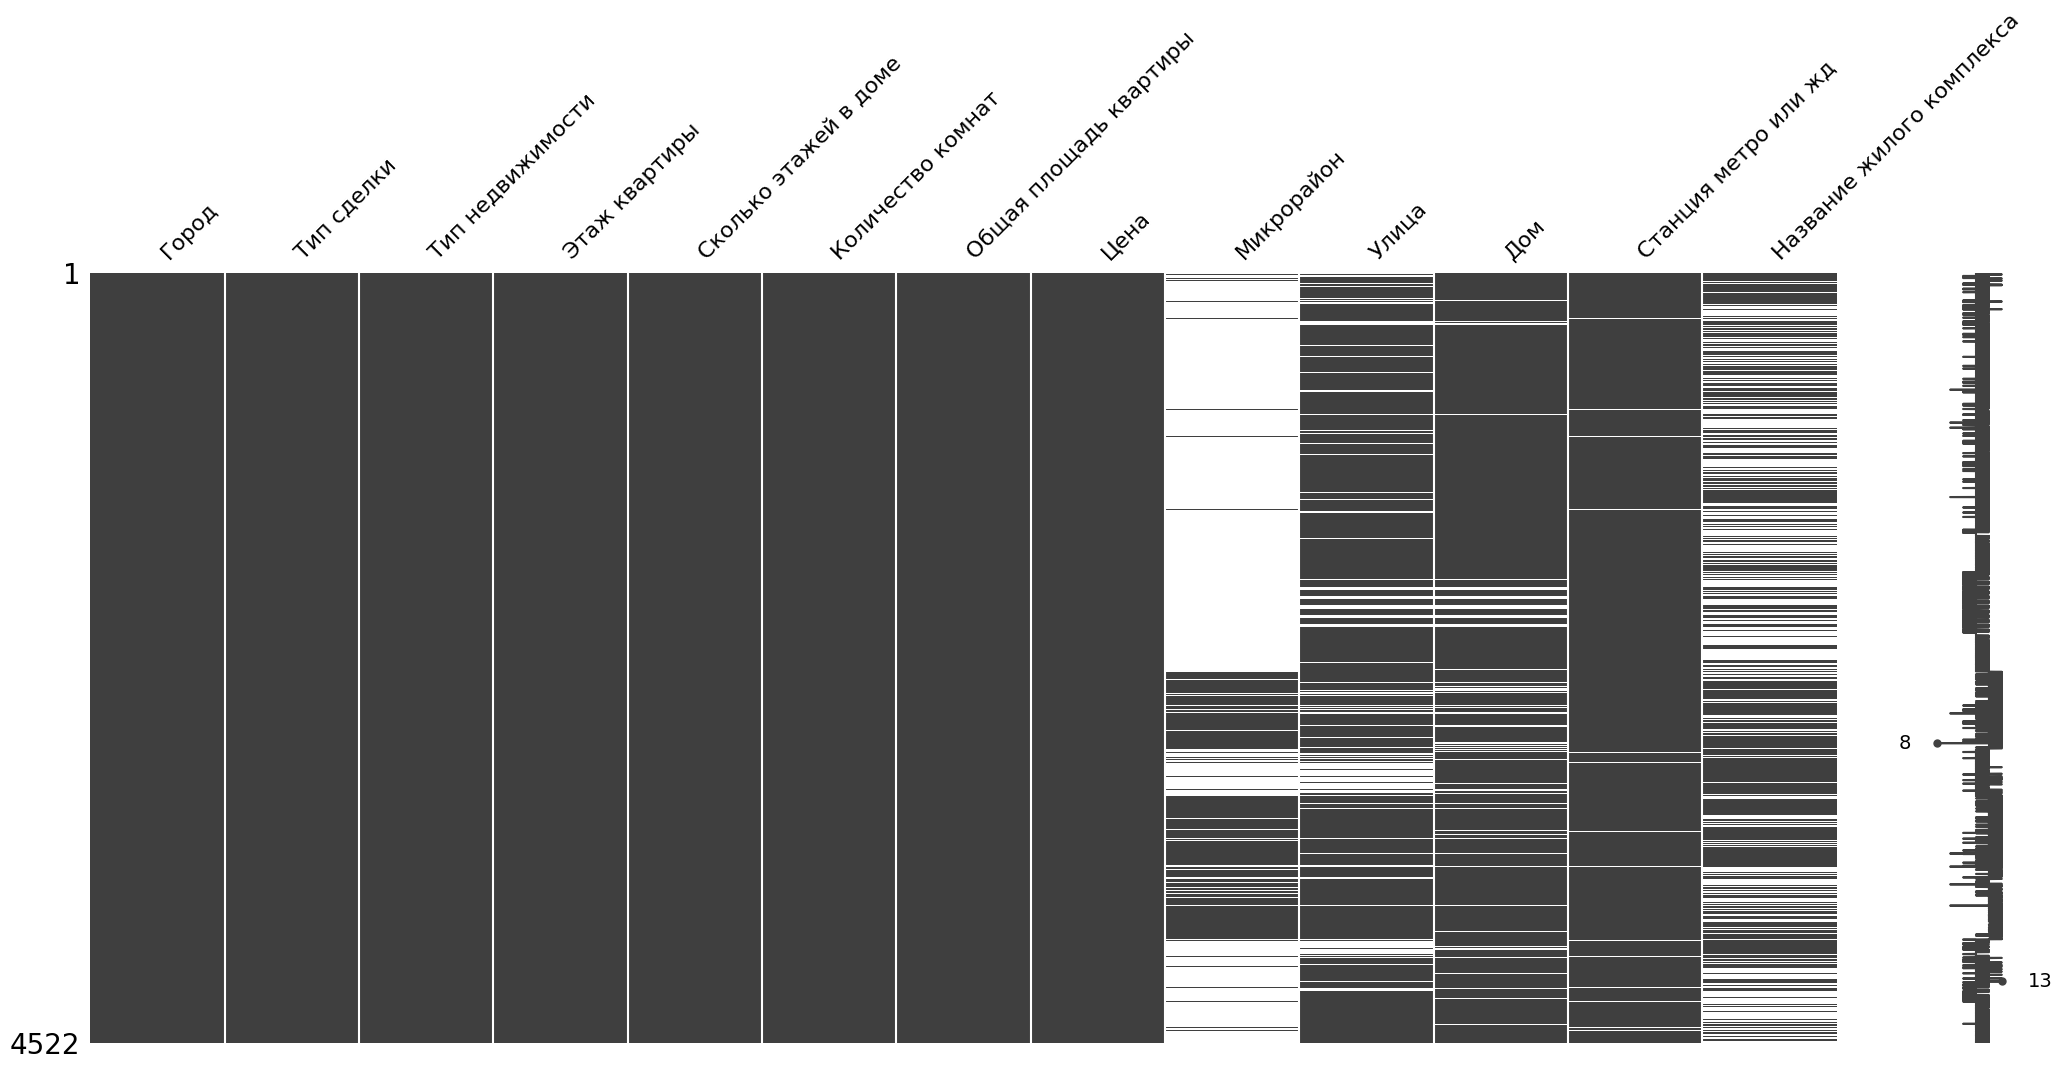

<Figure size 1500x900 with 0 Axes>

In [15]:
msno.matrix(df_cleaned)
plt.figure(figsize = (15,9))
plt.show()